In [32]:
import ast
import numpy as np
import matplotlib.pyplot as plt

from collections import defaultdict

off_on_data = []

with open('collected_rewards.csv','r') as f:
    for l in f.readlines():
        off_on_data.append(ast.literal_eval(l))

off_data = []

with open('collected_rewards_offline_only.csv','r') as f:
    for l in f.readlines():
        off_data.append(ast.literal_eval(l))

random_data = []

with open('collected_rewards_random.csv','r') as f:
    for l in f.readlines():
        random_data.append(ast.literal_eval(l))

longest_sample_len = len(random_data[max(enumerate(random_data),key=lambda x:len(x[1]))[0]])
print(longest_sample_len)

588


In [33]:
def collapse(data):
    def num_samples_of_len(data):
        len_to_num_samples = defaultdict(int)
        for i in range(0,len(data)):
            len_to_num_samples[len(data[i])] += 1
        return len_to_num_samples

    l_to_ns = num_samples_of_len(data)
    print(l_to_ns)
    arg = max(enumerate(data),key=lambda x:len(x[1]))[0]
    longest = data[arg]
    for i in range(0,len(data)):
        if i != arg:
            for index,val in enumerate(data[i]):
                longest[index] += val / l_to_ns[len(data[i])]
    return longest #+ [0]*(longest_sample_len-len(longest))

In [34]:
def plot(data):
    smashed = collapse(data)
    x_axis = range(0,len(smashed))
    fig = plt.figure(figsize=(7,5))
    plt.plot(x_axis,np.cumsum(smashed))
    fig.suptitle('cumulative sum of samples', fontsize=20)
    plt.xlabel('time step', fontsize=18)
    plt.ylabel('reward', fontsize=16)
    plt.legend()
    plt.show()

In [35]:
def success_rate(data):
    rate = 0
    for d in data:
        rate += (d[-1] == 1000) / len(data)
    return rate

In [36]:
def expected_reward(data):
    r = 0
    for d in data:
        r += sum(d) / len(data)
    return r

In [37]:
def average_steps(data):
    avg = 0
    for d in data:
        avg += len(d) / len(data)
    return avg

No handles with labels found to put in legend.


defaultdict(<class 'int'>, {2: 2, 4: 2, 5: 1, 7: 1, 8: 3, 12: 2, 14: 3, 20: 1, 17: 1, 19: 1, 18: 1, 21: 1, 22: 1, 23: 1, 24: 2, 26: 3, 28: 1, 30: 2, 29: 1, 36: 1, 37: 3, 35: 1, 38: 2, 39: 1, 40: 1, 46: 1, 48: 1, 52: 1, 51: 1, 50: 1, 58: 1, 56: 1, 57: 1, 59: 1, 42: 1, 63: 1, 69: 1, 70: 2, 71: 1, 75: 1, 72: 1, 81: 1, 82: 1, 83: 1, 84: 1, 85: 1, 89: 1, 88: 1, 92: 1, 91: 1, 98: 1, 106: 1, 109: 1, 108: 1, 113: 3, 115: 1, 117: 1, 95: 1, 116: 1, 122: 1, 127: 1, 126: 1, 110: 1, 138: 2, 140: 1, 143: 1, 146: 1, 148: 1, 150: 1, 158: 2, 159: 1, 166: 1, 168: 1, 177: 1, 182: 1, 193: 1, 201: 1, 214: 1, 202: 1, 199: 1, 207: 1, 227: 1, 213: 1, 231: 1, 230: 2, 236: 1, 222: 1, 246: 1, 250: 1, 216: 1, 280: 1, 281: 1, 288: 2, 291: 1, 296: 1, 304: 1, 321: 1, 320: 1, 330: 1, 318: 1, 359: 1, 399: 1, 416: 1, 429: 1, 541: 1, 578: 1, 588: 1})


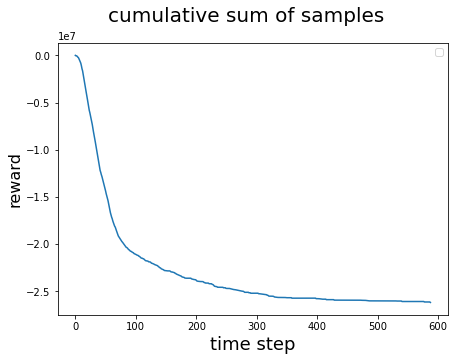

0.0390625
129.8515625


-431491.7578125001

In [38]:
plot(random_data)
print(success_rate(random_data))
print(average_steps(random_data))
expected_reward(random_data)

No handles with labels found to put in legend.


defaultdict(<class 'int'>, {2: 4, 3: 2, 5: 3, 7: 2, 10: 1, 11: 1, 13: 4, 15: 3, 18: 4, 17: 5, 19: 3, 21: 1, 24: 2, 23: 2, 26: 3, 28: 2, 33: 4, 36: 2, 35: 1, 40: 1, 38: 2, 39: 3, 41: 3, 43: 1, 44: 1, 46: 2, 49: 80, 48: 42, 47: 2, 50: 44, 4: 2, 6: 3, 8: 1, 9: 2, 12: 2, 16: 1, 14: 1, 22: 1, 20: 1, 27: 3, 29: 1, 31: 2, 32: 3, 34: 1, 37: 1, 42: 1})


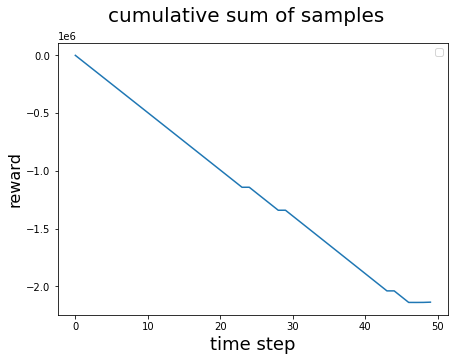

0.63671875
39.67578125


-25297.722216585513

In [39]:
plot(off_data)
print(success_rate(off_data))
print(average_steps(off_data))
expected_reward(off_data)

No handles with labels found to put in legend.


defaultdict(<class 'int'>, {2: 5, 31: 2, 48: 3, 49: 6, 50: 8, 53: 7, 52: 5, 51: 3, 55: 7, 54: 3, 56: 3, 57: 5, 62: 5, 58: 7, 61: 6, 59: 4, 63: 4, 60: 5, 64: 4, 66: 2, 67: 4, 68: 4, 69: 5, 71: 3, 72: 6, 75: 7, 77: 4, 76: 4, 78: 3, 79: 2, 82: 3, 80: 6, 84: 4, 81: 3, 83: 3, 86: 4, 87: 3, 89: 3, 88: 4, 95: 3, 94: 2, 97: 4, 99: 3, 101: 4, 102: 1, 106: 4, 108: 2, 113: 2, 120: 1, 117: 1, 115: 1, 134: 3, 124: 2, 122: 1, 130: 1, 133: 1, 156: 2, 192: 1, 222: 1, 243: 1, 311: 1, 4: 1, 24: 1, 65: 2, 70: 3, 73: 2, 74: 1, 85: 1, 91: 2, 96: 1, 98: 2, 103: 1, 104: 1, 100: 1, 112: 1, 116: 1, 121: 1, 126: 1, 128: 1, 127: 1, 136: 2, 138: 1, 146: 1, 155: 1, 142: 1, 147: 1, 169: 1, 172: 1, 173: 1, 158: 1, 175: 1, 164: 1, 189: 1, 163: 1, 197: 1, 184: 1, 219: 1, 248: 1})


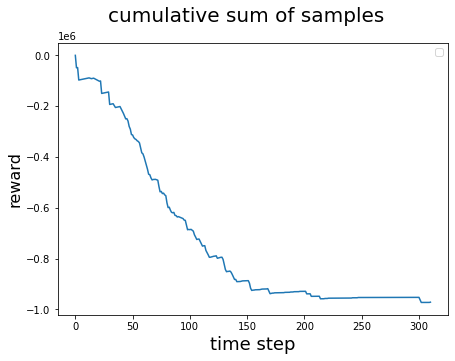

0.9568627450980363
83.84705882352941


-10488.316013071886

In [40]:
plot(off_on_data)
print(success_rate(off_on_data))
print(average_steps(off_on_data))
expected_reward(off_on_data)

In [41]:
def plot_mult(datas):
    fig = plt.figure(figsize=(7,5))
    for d in datas:
        smashed = collapse(d[0])
        x_axis = range(0,len(smashed[:50]))
        plt.plot(x_axis,np.cumsum(smashed[:50]),label=d[1])
        fig.suptitle('cumulative sum of samples', fontsize=20)
        plt.xlabel('time step', fontsize=18)
        plt.ylabel('reward', fontsize=16)
    plt.legend()
    plt.show()

defaultdict(<class 'int'>, {2: 2, 4: 2, 5: 1, 7: 1, 8: 3, 12: 2, 14: 3, 20: 1, 17: 1, 19: 1, 18: 1, 21: 1, 22: 1, 23: 1, 24: 2, 26: 3, 28: 1, 30: 2, 29: 1, 36: 1, 37: 3, 35: 1, 38: 2, 39: 1, 40: 1, 46: 1, 48: 1, 52: 1, 51: 1, 50: 1, 58: 1, 56: 1, 57: 1, 59: 1, 42: 1, 63: 1, 69: 1, 70: 2, 71: 1, 75: 1, 72: 1, 81: 1, 82: 1, 83: 1, 84: 1, 85: 1, 89: 1, 88: 1, 92: 1, 91: 1, 98: 1, 106: 1, 109: 1, 108: 1, 113: 3, 115: 1, 117: 1, 95: 1, 116: 1, 122: 1, 127: 1, 126: 1, 110: 1, 138: 2, 140: 1, 143: 1, 146: 1, 148: 1, 150: 1, 158: 2, 159: 1, 166: 1, 168: 1, 177: 1, 182: 1, 193: 1, 201: 1, 214: 1, 202: 1, 199: 1, 207: 1, 227: 1, 213: 1, 231: 1, 230: 2, 236: 1, 222: 1, 246: 1, 250: 1, 216: 1, 280: 1, 281: 1, 288: 2, 291: 1, 296: 1, 304: 1, 321: 1, 320: 1, 330: 1, 318: 1, 359: 1, 399: 1, 416: 1, 429: 1, 541: 1, 578: 1, 588: 1})
defaultdict(<class 'int'>, {2: 4, 3: 2, 5: 3, 7: 2, 10: 1, 11: 1, 13: 4, 15: 3, 18: 4, 17: 5, 19: 3, 21: 1, 24: 2, 23: 2, 26: 3, 28: 2, 33: 4, 36: 2, 35: 1, 40: 1, 38: 2, 3

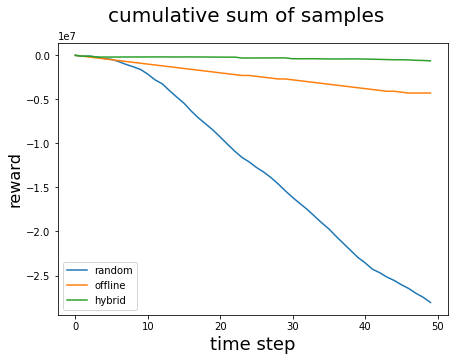

In [42]:

plot_mult([(random_data,'random'),(off_data,'offline'),(off_on_data,'hybrid')])